In [15]:


import pandas as pd

# Load the test dataset
test_df = pd.read_csv("/kaggle/input/nlp-getting-started/test.csv")

# Display the first few rows of the test dataset
print(test_df.head())


   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB
None


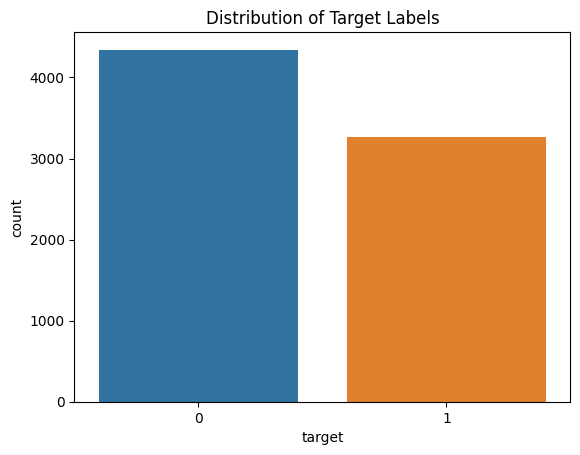

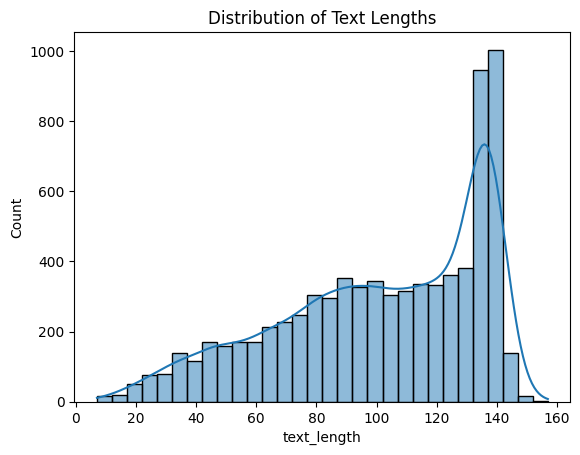

In [16]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training dataset
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

# Display the first few rows of the dataset
print(train_df.head())

# Basic statistics
print(train_df.info())

# Distribution of target labels
sns.countplot(x='target', data=train_df)
plt.title('Distribution of Target Labels')
plt.show()

# Histogram of text lengths
train_df['text_length'] = train_df['text'].apply(len)
sns.histplot(train_df['text_length'], bins=30, kde=True)
plt.title('Distribution of Text Lengths')
plt.show()

# Handling missing values
train_df['location'].fillna('Unknown', inplace=True)
train_df['keyword'].fillna('Unknown', inplace=True)
train_df.drop(columns=['text_length'], inplace=True)


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the training dataset
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

# Basic preprocessing
train_df['location'].fillna('Unknown', inplace=True)
train_df['keyword'].fillna('Unknown', inplace=True)

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

vocab_size = len(tokenizer.word_index) + 1
max_length = 50

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')

val_sequences = tokenizer.texts_to_sequences(val_data['text'])
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post')

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=max_length))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history = model.fit(train_padded, train_data['target'], epochs=5, validation_data=(val_padded, val_data['target']))

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 50)            973000    
                                                                 
 lstm_5 (LSTM)               (None, 100)               60400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1033501 (3.94 MB)
Trainable params: 1033501 (3.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
191/191 [==============================] - 14s 56ms/step - loss: 0.6447 - accuracy: 0.6259 - val_loss: 0.5849 - val_accuracy: 0.7374
Epoch 2/5
191/191 [==============================] - 10s 53ms/step - loss: 0.5248 - accuracy: 0.7791 - val_loss: 0.5616 - val_accuracy: 0

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Bidirectional, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score

# Load the training dataset
train_df = pd.read_csv("/kaggle/input/nlp-getting-started/train.csv")

# Basic preprocessing
train_df['location'].fillna('Unknown', inplace=True)
train_df['keyword'].fillna('Unknown', inplace=True)

# Split the data into training and validation sets
train_data, val_data = train_test_split(train_df, test_size=0.2, random_state=42)

# Tokenize and pad the text sequences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data['text'])

vocab_size = len(tokenizer.word_index) + 1
max_length = 50

train_sequences = tokenizer.texts_to_sequences(train_data['text'])
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post')

val_sequences = tokenizer.texts_to_sequences(val_data['text'])
val_padded = pad_sequences(val_sequences, maxlen=max_length, padding='post')

# Define different architectures for experimentation
architectures = [
    {'embedding_dim': 50, 'lstm_units': 100},
    {'embedding_dim': 100, 'lstm_units': 100},
    {'embedding_dim': 50, 'gru_units': 100},
    {'embedding_dim': 50, 'bidirectional_lstm_units': 100},
]

# Hyperparameter tuning and model comparison
results = []

for arch_params in architectures:
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=vocab_size, output_dim=arch_params['embedding_dim'], input_length=max_length))

    # Choose the appropriate layer based on the architecture parameters
    if 'lstm_units' in arch_params:
        model.add(LSTM(units=arch_params['lstm_units']))
    elif 'gru_units' in arch_params:
        model.add(GRU(units=arch_params['gru_units']))
    elif 'bidirectional_lstm_units' in arch_params:
        model.add(Bidirectional(LSTM(units=arch_params['bidirectional_lstm_units'])))

    # Dense layer
    model.add(Dense(units=1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(train_padded, train_data['target'], epochs=5, validation_data=(val_padded, val_data['target']), verbose=0)

    # Evaluate the model on validation set
    val_predictions = model.predict_classes(val_padded)
    accuracy = accuracy_score(val_data['target'], val_predictions)

    # Store results
    results.append({'architecture': arch_params, 'accuracy': accuracy})

# Display results in a table
result_df = pd.DataFrame(results)
print(result_df)

# Plot bar chart for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='accuracy', y='architecture', data=result_df)
plt.title('Model Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Architecture')
plt.show()
